# Statistiques sous `Python` - *correction*


Ce document n'est pas une correction en soit mais un descriptif des opérations à réaliser pour répondre à la demande. N'hésitez pas à me contacter si vous n'arrivez pas à appliquer les codes vus dans le cours, sur ce jeu de données.

## Exercices

A partir du fichier [`diamonds.csv`](diamonds.csv) (voir l'aide [ici](http://docs.ggplot2.org/0.9.3.1/diamonds.html)), analyser les données suivant le déroulement classique 

1. Description de chaque variable
2. Recherche des liens entre le prix (`price`) et les autres variables


En premier, importation des différents modules et configuration pour les graphiques.

In [1]:
import pandas
import matplotlib
import scipy.stats
import numpy

%matplotlib inline

Ensuite, importation des données

In [2]:
diamonds = pandas.read_csv("diamonds.csv",
                          header=0, sep=",")

In [3]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Description des variables

Dans ce cadre, il faut décrire chaque variable séparement. Voici la répartition des variables et les étapes à réaliser pour chaque type de variable :

- *quantitative* : `carat`, `depth`, `table`, `price`, `x`, `y`, `z`
    - Moyenne, écart-type, médiane, minimum et maximum
    - Histogramme pour avoir un aperçu de la distribution, et éventuellement comparer à une gaussienne
        - Test de normalité à ajouter
    - Boîte à moustaches pour estimer la présence ou non d'outliers
- *qualitative* : `cut`, `color`, `clarity`
    - Table d'effectifs et de pourcentages
    - Diagramme en barres (diagramme circulaire à éviter ici, car trop de modalités)

Nous allons faire une fonction permettant la description d'une variable (en fonction de son type bien évidemment), et l'utiliser pour chacune des colonnes du jeu de données.

### Quanti


Variable   : carat 

Moyenne    :  0.8
Ecart-type :  0.47
Médiane    :  0.7
Minimum    :  0.2
Maximum    :  5.01


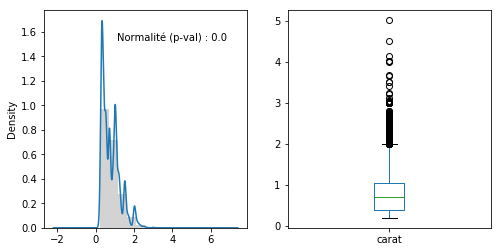

In [4]:
def descQuanti(var):
    # description d'une variable quantitative du jeu de données diamonds
    # récupération des valeurs
    x = diamonds[var]
    # affichage des différentes informations demandées
    print("Variable   :", var, "\n")
    print("Moyenne    : ", numpy.mean(x).round(2))
    print("Ecart-type : ", numpy.std(x).round(2))
    print("Médiane    : ", numpy.median(x).round(2))
    print("Minimum    : ", numpy.min(x).round(2))
    print("Maximum    : ", numpy.max(x).round(2))
    # création d'un graphique avec 2 zones
    fig, (ax1, ax2) = matplotlib.pyplot.subplots(nrows=1, ncols=2, figsize=(8, 4))
    # création de l'histogramme avec la densité
    h = x.plot(kind = "hist", normed = True, color = "lightgrey", ax = ax1)
    x.plot(kind = "kde", ax = ax1)
    # on y ajoute la p-value du test de normalité
    t = scipy.stats.normaltest(x)
    matplotlib.pyplot.text(.9, .9, "Normalité (p-val) : " + str(t.pvalue),
                           horizontalalignment='right',
                           verticalalignment='top',
                           transform = h.transAxes)
    # création de la boîte à moustache
    diamonds.boxplot(column = var, grid = False, ax = ax2)

# on lance sur la variable 'carat' 
descQuanti("carat")
# à faire sur les autres variables
# descQuanti("depth")
# ...

### Quali

Variable   : cut 

col_0      Effectif  Pourcentage
cut                             
Fair           1610         2.98
Good           4906         9.10
Ideal         21551        39.95
Premium       13791        25.57
Very Good     12082        22.40


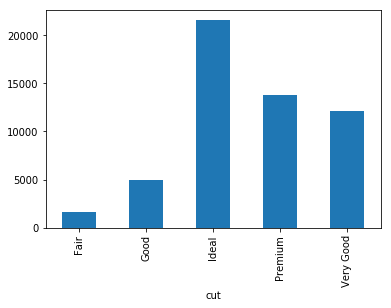

In [5]:
def descQuali(var):
    # description d'une variable qualitative du jeu de données diamonds
    # récupération des valeurs
    x = diamonds[var]
    # affichage des différentes informations demandées
    print("Variable   :", var, "\n")
    # tableau des effectifs et des proportions
    eff = pandas.crosstab(x, "Effectif")
    pro = pandas.crosstab(x, "Pourcentage", normalize=True) * 100
    print(pandas.concat([eff, pro.round(2)], axis = 1))
    # diagramme en barres
    eff.plot(kind = "bar", legend = False)

# on lance sur la variable "cut"
descQuali("cut")
# à faire sur les autres variables
# descQuali("color")
# ...

## Lien avec `price`

Ici, en fonction du type de la variable pour laquelle estimer le lien avec `price`, les opérations ne sont pas les mêmes à effectuer.

- *quantitative* : `carat`, `depth`, `table`, `x`, `y`, `z`
    - Corrélation, avec test de corrélation
    - Nuage de points
- *qualitative* : `cut`, `color`, `clarity`
    - ANOVA
    - Boîtes à moustaches pour chaque modalité

On peut commencer par représenter la corrélation de chaque variable quantitative avec la variable `price`.

In [6]:
# calcul des corrélations et affichage
cor = diamonds.corr().price
cor

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

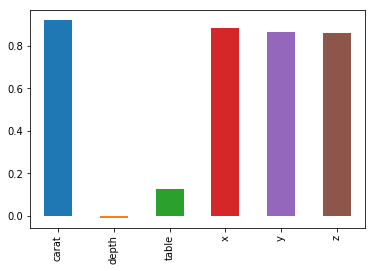

In [7]:
# représentation sur un diagramme en barres (peu classique mais efficace)
cor.drop("price").plot(kind = "bar")

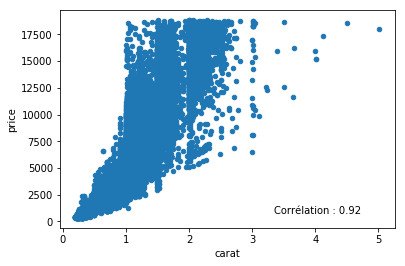

In [8]:
# Création d'une fonction affichant le nuage de points (avec la corrélation)
def lienPriceQuanti(var):
    # nuage de points entre price et la variable passée en paramètre pour le jeu de données diamonds
    n = diamonds.plot.scatter(var, "price")
    # calcul de la corrélation
    cor = diamonds.price.corr(diamonds[var])
    # affichage de la corrélation
    matplotlib.pyplot.text(.9, .1, "Corrélation : " + str(cor.round(2)),
                           horizontalalignment='right',
                           verticalalignment='top',
                           transform = n.transAxes)

# on lance sur la variable "carat"
lienPriceQuanti("carat")
# à faire sur les autres variables
# lienPriceQuanti("depth")
# ...

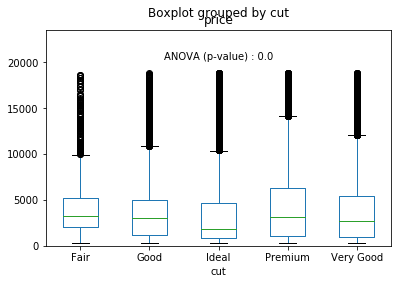

In [9]:
# Création d'une fonction pour établir le lien entre price et une variable quali
def lienPriceQuali(var):
    # on récupère les valeurs de la variable
    x = diamonds[var]
    # création des boîtes à moustaches
    b = diamonds.boxplot(column = "price", by = var, grid = False) 
    # ajout d'un espace en haut du graphique pour y mettre la p-value de l'ANOVA
    b.set_ylim(0, numpy.max(diamonds.price) * 1.25)
    # calcul de l'ANOVA
    g = [diamonds.price[x == s] for s in list(x.unique())]
    aov = scipy.stats.f_oneway(*g)
    # ajout de la p-value dans le graphique
    matplotlib.pyplot.text(.5, .9, "ANOVA (p-value) : " + str(aov.pvalue.round(5)),
                           horizontalalignment='center',
                           verticalalignment='top',
                           transform = b.transAxes)

# on lance sur la variable "cut"
lienPriceQuali("cut")
# à faire sur les autres variables
# lienPriceQuali("color")
# ...